In [30]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")



project_root = Path.cwd().parent  
sys.path.append(str(project_root))
from src.models import get_model
try:
    if Path(os.getcwd()).name == 'notebooks':
        os.chdir('..')
        print(f"CWD đã chuyển sang: {os.getcwd()}")
except Exception as e:
    print(f"Lỗi chuyển CWD: {e}")

In [22]:
# 1. Tải lại dữ liệu đã xử lý từ File 1
X_train = np.load('/Users/binhminh/Documents/Intro ML code /Data/X_train.npy')
X_test = np.load('/Users/binhminh/Documents/Intro ML code /Data/X_test.npy')
y_train = np.load('/Users/binhminh/Documents/Intro ML code /Data/y_train.npy')
y_test = np.load('/Users/binhminh/Documents/Intro ML code /Data/y_test.npy')

In [23]:
# BEGIN: Hyperparameter optimization
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model_lr = grid_search.best_estimator_
best_params_lr = grid_search.best_params_

print(f"Best parameters: {best_params_lr}")
print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")

Best parameters: {'C': 0.1, 'solver': 'liblinear'}
Best cross-validated accuracy: 0.9736


In [24]:
from sklearn.model_selection import GridSearchCV
model_name = "Logistic Regression"
print(f"Đang huấn luyện {model_name}...")

# Fit the best model on the training data
best_model_lr.fit(X_train, y_train)
y_pred = best_model_lr.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\nĐộ chính xác (Accuracy) của {model_name}: {acc*100:.2f}%")
print("-" * 30)
print("Báo cáo chi tiết (Precision, Recall, F1-Score):")
print(classification_report(y_test, y_pred))
print("-" * 30)
print(f'F1_Score: {classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["f1-score"]:.4f}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred):.4f}')

# END: Hyperparameter optimization

Đang huấn luyện Logistic Regression...

Độ chính xác (Accuracy) của Logistic Regression: 98.25%
------------------------------
Báo cáo chi tiết (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

------------------------------
F1_Score: 0.9824
Accuracy Score: 0.9825


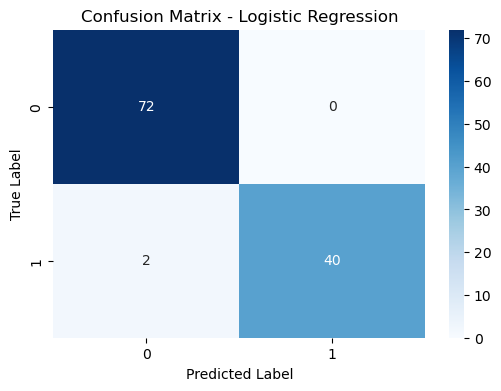

In [25]:
# 5. Vẽ Confusion Matrix (Tùy chọn để làm đẹp báo cáo)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [31]:
import joblib
import os

# Đảm bảo thư mục models tồn tại
os.makedirs('models', exist_ok=True)

# Tên file chuẩn hóa
file_path = f"models/logistic_regression.pkl"

# Lưu mô hình đã train thành công (best_model_lr)
joblib.dump(best_model_lr, file_path)

print(f"✅ Đã lưu mô hình {model_name} tại: {file_path}")

✅ Đã lưu mô hình Logistic Regression tại: models/logistic_regression.pkl
